# Import libraries

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load and prepare the dataset

In [63]:
data = pd.read_csv('Road_accidents.csv')
df=data.copy()
years = np.array([2016, 2017, 2018]).reshape(-1, 1)
predicted_2019 = {}
predicted_2020 = {}

# Predict using Linear Regression

In [65]:
for index, row in df.iterrows():
    age_group = row['Age-Group']
    
    if age_group.lower() == 'total':  # skip total row
        continue
    
    deaths = np.array([row['Number of Persons Killed - 2016'],
                       row['Number of Persons Killed - 2017'],
                       row['Number of Persons Killed - 2018']])
    
    # Linear Regression
    model = LinearRegression()
    model.fit(years, deaths)
    
  
    pred_2019 = int(model.predict([[2019]])[0])
    pred_2020 = int(model.predict([[2020]])[0])
    
    predicted_2019[age_group] = pred_2019
    predicted_2020[age_group] = pred_2020

# Add predictions

In [66]:
df['Predicted 2019'] = df['Age-Group'].apply(lambda x: predicted_2019.get(x, 0))
df['Predicted 2020'] = df['Age-Group'].apply(lambda x: predicted_2020.get(x, 0))


total_2019 = sum(predicted_2019.values())
total_2020 = sum(predicted_2020.values())
df.loc[df['Age-Group'].str.lower() == 'total', 'Predicted 2019'] = total_2019
df.loc[df['Age-Group'].str.lower() == 'total', 'Predicted 2020'] = total_2020



# Print results

In [67]:
display(df)
print(f"\nPredicted total persons killed in 2019: {total_2019}")
print(f"Predicted total persons killed in 2020: {total_2020}")

,Age-Group,Number of Persons Killed - 2016,Number of Persons Killed - 2017,Number of Persons Killed - 2018,Predicted 2019,Predicted 2020
0,Less than 18,10622,9408,9977,9357,9034
1,18-25,31775,34244,32777,33934,34435
2,25-35,38076,39549,39960,41079,42021
3,35-45,33558,32788,32672,32120,31677
4,45-60,22174,22462,22798,23102,23414
5,Above 60,8814,9384,9075,9352,9482
6,Age not known,5766,78,4158,1726,922
7,Total,150785,147913,151417,150670,150985



Predicted total persons killed in 2019: 150670
Predicted total persons killed in 2020: 150985


# Vizualization

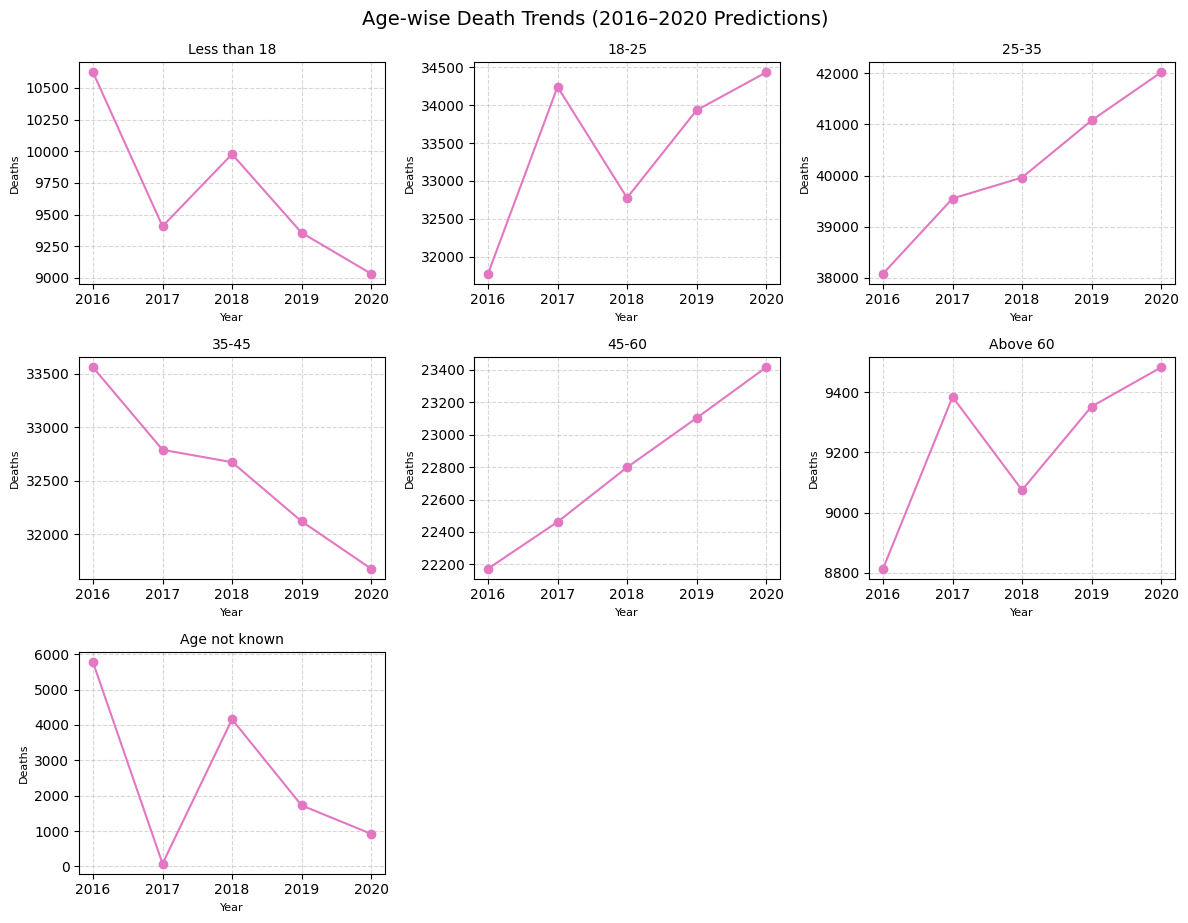

In [70]:
age_groups = df[df['Age-Group'].str.lower() != 'total']

years_all = [2016, 2017, 2018, 2019, 2020]
cols = 3
rows = int(np.ceil(len(age_groups) / cols))

plt.figure(figsize=(12, rows * 3))

for i, (index, row) in enumerate(age_groups.iterrows(), start=1):
    plt.subplot(rows, cols, i)
    deaths = [
        row['Number of Persons Killed - 2016'],
        row['Number of Persons Killed - 2017'],
        row['Number of Persons Killed - 2018'],
        row['Predicted 2019'],
        row['Predicted 2020']
    ]
    plt.plot(years_all, deaths, marker='o', linestyle='-', color='tab:pink')
    plt.title(row['Age-Group'], fontsize=10)
    plt.xlabel("Year", fontsize=8)
    plt.ylabel("Deaths", fontsize=8)
    plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.suptitle("Age-wise Death Trends (2016–2020 Predictions)", fontsize=14, y=1.02)
plt.show()
